In [28]:
!pip install pandas numpy matplotlib seaborn scikit-learn




In [2]:
import requests

# GitHub raw URL of the dataset
url = "https://raw.githubusercontent.com/nassriayman/Predictive-Maintenance-for-Vehicules/main/engine_data.csv"

# Save the dataset
response = requests.get(url)
with open("engine_data.csv", "wb") as file:
    file.write(response.content)

print("Dataset downloaded successfully! ✅")


Dataset downloaded successfully! ✅


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("engine_data.csv")

# Display first few rows
print(df.head())

# Check column names
print(df.columns)

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  
0     84.144163     81.632187                 1  
1     77.640934     82.445724                 0  
2     77.752266     79.645777                 1  
3     74.129907     71.774629                 1  
4     78.396989     87.000225                 0  
Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')


In [4]:
import numpy as np
import pandas as pd
import random

# Load the existing dataset
df = pd.read_csv("engine_data.csv")  # Replace with your actual file name

# Add new columns with synthetic values
np.random.seed(42)

df["tire_pressure"] = np.random.normal(loc=32, scale=2, size=len(df))  # Normal ~32 PSI
df["battery_voltage"] = np.random.normal(loc=12.5, scale=0.5, size=len(df))  # Normal ~12.5V
df["brake_pad_thickness"] = np.linspace(10, 2, num=len(df))  # Gradual brake wear
df["transmission_temp"] = np.random.normal(loc=85, scale=5, size=len(df))  # Normal ~85°C

# Ensure "failure_label" column exists (initialize with 0 if missing)
if "failure_label" not in df.columns:
    df["failure_label"] = 0  # Assume no failures initially

# Introduce random failures
failure_indices = random.sample(range(len(df)), k=500)  # Select random failure points

for idx in failure_indices:
    failure_type = np.random.choice(["tire", "battery", "brake", "transmission"])
    
    if failure_type == "tire":
        df.at[idx, "tire_pressure"] = np.random.uniform(10, 18)  # Low tire pressure (Failure)
    elif failure_type == "battery":
        df.at[idx, "battery_voltage"] = np.random.uniform(8, 9.5)  # Low battery voltage (Failure)
    elif failure_type == "brake":
        df.at[idx, "brake_pad_thickness"] = np.random.uniform(0.5, 2)  # Worn-out brakes (Failure)
    elif failure_type == "transmission":
        df.at[idx, "transmission_temp"] = np.random.uniform(115, 140)  # Overheating (Failure)

# Update failure labels based on new failure conditions
df["failure_label"] = (
    (df["failure_label"] == 1) |  # Keep existing failures
    (df["tire_pressure"] < 20) |
    (df["battery_voltage"] < 10) |
    (df["brake_pad_thickness"] < 3) |
    (df["transmission_temp"] > 110)
).astype(int)  # Convert to 0 or 1

# Save the updated dataset
df.to_csv("updated_engine_data.csv", index=False)

print("✅ Updated dataset saved as 'updated_engine_data.csv'")



✅ Updated dataset saved as 'updated_engine_data.csv'


In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv("updated_engine_data.csv")  # Make sure to load the correct dataset

# Ensure 'failure_label' and 'Engine Condition' exist
if "failure_label" in df.columns and "Engine Condition" in df.columns:
    # Create the new target column
    df["vehicle_failure"] = ((df["failure_label"] == 1) | (df["Engine Condition"] == 1)).astype(int)
else:
    print("Error: Columns 'failure_label' or 'Engine Condition' are missing in the dataset.")

# Save the updated dataset
df.to_csv("final_vehicle_data.csv", index=False)

print("✅ Dataset updated successfully! 'vehicle_failure' column added.")


✅ Dataset updated successfully! 'vehicle_failure' column added.


In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("final_vehicle_data.csv")

# Display first few rows
print(df.head())

# Check column names
print(df.columns)

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  tire_pressure  \
0     84.144163     81.632187                 1      32.993428   
1     77.640934     82.445724                 0      31.723471   
2     77.752266     79.645777                 1      33.295377   
3     74.129907     71.774629                 1      35.046060   
4     78.396989     87.000225                 0      31.531693   

   battery_voltage  brake_pad_thickness  transmission_temp  failure_label  \
0        12.292718            10.000000          85.979270              0   
1        12.101888             9.999590 

In [6]:
print(df.isnull().sum())  # Check missing values


Engine rpm             0
Lub oil pressure       0
Fuel pressure          0
Coolant pressure       0
lub oil temp           0
Coolant temp           0
Engine Condition       0
tire_pressure          0
battery_voltage        0
brake_pad_thickness    0
transmission_temp      0
failure_label          0
vehicle_failure        0
dtype: int64


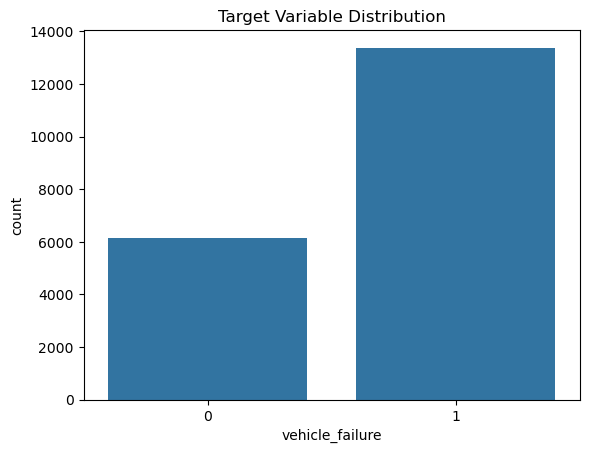

vehicle_failure
1    68.523164
0    31.476836
Name: proportion, dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["vehicle_failure"])
plt.title("Target Variable Distribution")
plt.show()

print(df["vehicle_failure"].value_counts(normalize=True) * 100)  # Percentage of each class


In [8]:
!pip install imbalanced-learn


In [9]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate features and target
X = df.drop(columns=["vehicle_failure"])
y = df["vehicle_failure"]

# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["vehicle_failure"] = y_resampled

# Check new class distribution
print(y_resampled.value_counts(normalize=True) * 100)

vehicle_failure
1    50.0
0    50.0
Name: proportion, dtype: float64


C:\Users\nalaj\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [10]:
df_resampled.to_csv("resampled_vehicle_data.csv", index=False)
print("Dataset saved as resampled_vehicle_data.csv")


Dataset saved as resampled_vehicle_data.csv


In [11]:
print(df_resampled.isnull().sum())


Engine rpm             0
Lub oil pressure       0
Fuel pressure          0
Coolant pressure       0
lub oil temp           0
Coolant temp           0
Engine Condition       0
tire_pressure          0
battery_voltage        0
brake_pad_thickness    0
transmission_temp      0
failure_label          0
vehicle_failure        0
dtype: int64


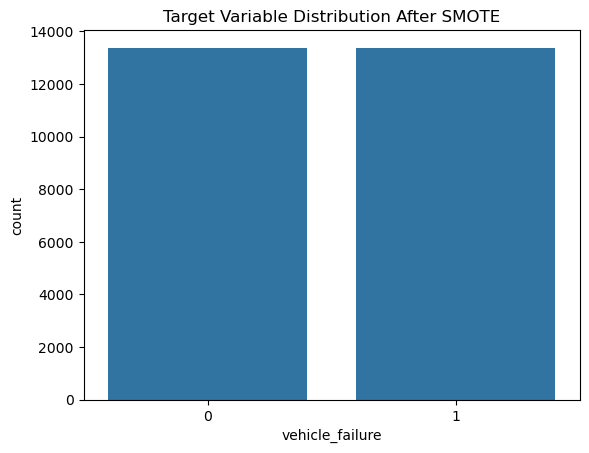

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_resampled["vehicle_failure"])
plt.title("Target Variable Distribution After SMOTE")
plt.show()


In [13]:
df_resampled.describe()


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition,tire_pressure,battery_voltage,brake_pad_thickness,transmission_temp,failure_label,vehicle_failure
count,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000,26772.000000
mean,815.651464,3.282558,6.522139,2.334688,77.707962,78.525057,0.460070,31.919539,12.481927,6.102084,85.224273,0.107538,0.500000
std,271.568451,0.974247,2.622872,0.992461,3.050677,6.053772,0.498412,2.280642,0.541749,2.201081,5.728908,0.309801,0.500009
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000,10.200821,8.002827,0.507958,63.523045,0.000000,0.000000
25%,616.000000,2.538350,4.883997,1.638033,75.843029,74.062562,0.000000,30.706921,12.173545,4.311355,81.795965,0.000000,0.000000
50%,774.000000,3.157164,6.092361,2.178203,76.886492,78.465480,0.000000,31.989852,12.500342,6.122324,85.048918,0.000000,0.500000
75%,963.000000,3.985849,7.566200,2.820879,78.101953,82.904392,1.000000,33.278758,12.817911,7.957961,88.356173,0.000000,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000,40.958169,14.363917,10.000000,139.819545,1.000000,1.000000


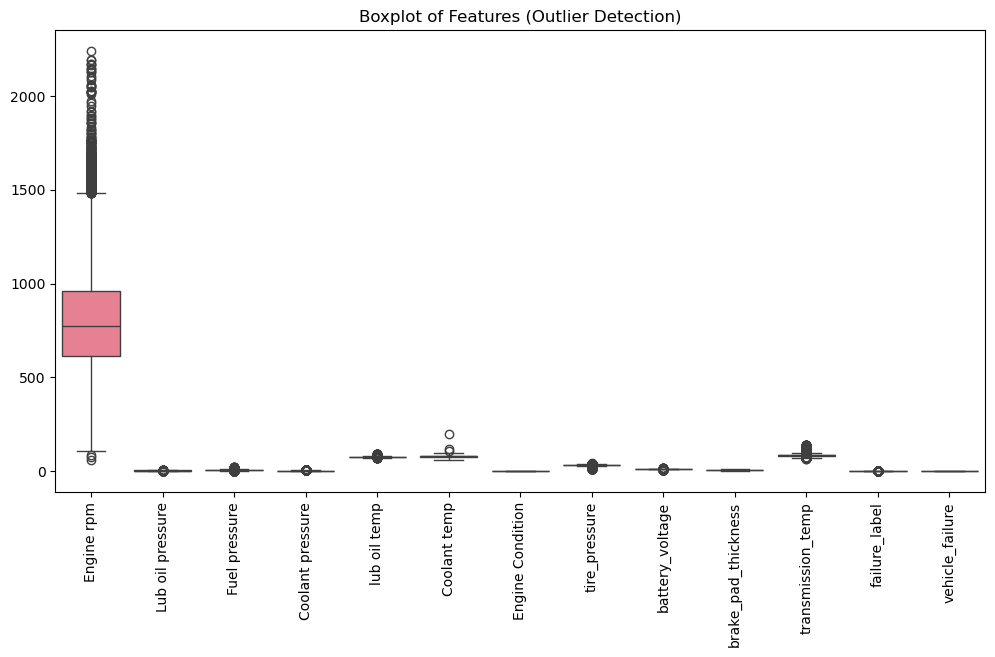

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df_resampled)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Outlier Detection)")
plt.show()


In [15]:
df_resampled.describe().T


,count,mean,std,min,25%,50%,75%,max
Engine rpm,26772.0,815.651464,271.568451,61.000000,616.000000,774.000000,963.000000,2239.000000
Lub oil pressure,26772.0,3.282558,0.974247,0.003384,2.538350,3.157164,3.985849,7.265566
Fuel pressure,26772.0,6.522139,2.622872,0.003187,4.883997,6.092361,7.566200,21.138326
Coolant pressure,26772.0,2.334688,0.992461,0.002483,1.638033,2.178203,2.820879,7.478505
lub oil temp,26772.0,77.707962,3.050677,71.321974,75.843029,76.886492,78.101953,89.580796
Coolant temp,26772.0,78.525057,6.053772,61.673325,74.062562,78.465480,82.904392,195.527912
Engine Condition,26772.0,0.460070,0.498412,0.000000,0.000000,0.000000,1.000000,1.000000
tire_pressure,26772.0,31.919539,2.280642,10.200821,30.706921,31.989852,33.278758,40.958169
battery_voltage,26772.0,12.481927,0.541749,8.002827,12.173545,12.500342,12.817911,14.363917
brake_pad_thickness,26772.0,6.102084,2.201081,0.507958,4.311355,6.122324,7.957961,10.000000


In [16]:
import pandas as pd

# Load dataset
df = pd.read_csv("resampled_vehicle_data.csv")

# Display first few rows
print(df.head())

# Check column names
print(df.columns)


   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  tire_pressure  \
0     84.144163     81.632187                 1      32.993428   
1     77.640934     82.445724                 0      31.723471   
2     77.752266     79.645777                 1      33.295377   
3     74.129907     71.774629                 1      35.046060   
4     78.396989     87.000225                 0      31.531693   

   battery_voltage  brake_pad_thickness  transmission_temp  failure_label  \
0        12.292718            10.000000          85.979270              0   
1        12.101888             9.999590 

In [17]:
print(df.dtypes)


Engine rpm               int64
Lub oil pressure       float64
Fuel pressure          float64
Coolant pressure       float64
lub oil temp           float64
Coolant temp           float64
Engine Condition         int64
tire_pressure          float64
battery_voltage        float64
brake_pad_thickness    float64
transmission_temp      float64
failure_label            int64
vehicle_failure          int64
dtype: object


In [18]:
print(df.isnull().sum())


Engine rpm             0
Lub oil pressure       0
Fuel pressure          0
Coolant pressure       0
lub oil temp           0
Coolant temp           0
Engine Condition       0
tire_pressure          0
battery_voltage        0
brake_pad_thickness    0
transmission_temp      0
failure_label          0
vehicle_failure        0
dtype: int64


In [19]:
print(df['vehicle_failure'].value_counts(normalize=True) * 100)


vehicle_failure
1    50.0
0    50.0
Name: proportion, dtype: float64


✅ Accuracy: 0.7675070028011205

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79      2678
           1       0.82      0.68      0.75      2677

    accuracy                           0.77      5355
   macro avg       0.78      0.77      0.77      5355
weighted avg       0.78      0.77      0.77      5355



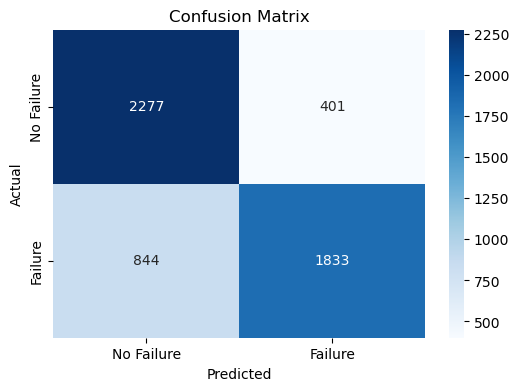

In [20]:
# ✅ Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Step 2: Load your dataset (assuming it's already loaded as `df`)
# If not loaded yet, uncomment and use:
# df = pd.read_csv("your_file.csv")

# ✅ Step 3: Define features (X) and target (y)
X = df.drop(columns=["vehicle_failure", "Engine Condition", "failure_label"])  # All features
y = df["vehicle_failure"]                 # Target label

# ✅ Step 4: Split data into training and testing sets (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Step 5: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    class_weight="balanced"  # optional, helps with any future imbalance
)
rf_model.fit(X_train, y_train)

# ✅ Step 6: Make predictions on test set
y_pred = rf_model.predict(X_test)

# ✅ Step 7: Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Step 8: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

✅ ROC AUC Score: 0.9912


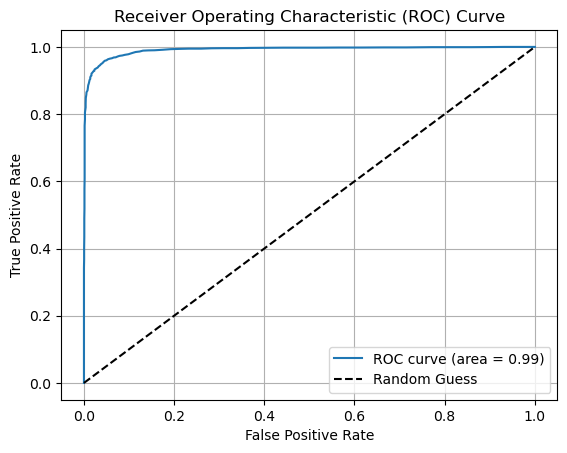

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities
y_proba = rf_model.predict_proba(X_test)[:, 1]

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"✅ ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [30]:
import pickle

# rf_model is your already trained model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Model saved successfully as rf_model.pkl")


Model saved successfully as rf_model.pkl
